<a href="https://colab.research.google.com/github/SohailaDiab/365-Days-of-AI/blob/main/CarPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for Regression

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1. Data preparation

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
!wget $data

--2022-09-17 20:58:35--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv’

data.csv            100%[===================>]   1.41M  --.-KB/s    in 0.009s  

2022-09-17 20:58:35 (159 MB/s) - ‘data.csv’ saved [1475504/1475504]



In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


We can see that the column headings aren't ideal since they are not lowercase and there are spaces.

The values are also inconsistent so we will need to change the string values to lowercase

In [6]:
# Make the column names in lowercase and change spaces to underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [7]:
# Get the column names that are of type object (string)
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [8]:
# Loop over the column names in `strings` and access these columns
# in the df to change the values to lowercase and no spaces
for column in strings:
  df[column] = df[column].str.lower().str.replace(' ', '_')

In [9]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


The data now looks cleaner

# 2. Exploratory Data Analysis

In [10]:
# First 5 unique values and number of unique values for each column
for col in df.columns:
  print(col)
  print(f'First 5 unique values: {df[col].unique()[:5]}')
  print(f'Number of unique values: {df[col].nunique()}\n')

make
First 5 unique values: ['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
Number of unique values: 48

model
First 5 unique values: ['1_series_m' '1_series' '100' '124_spider' '190-class']
Number of unique values: 914

year
First 5 unique values: [2011 2012 2013 1992 1993]
Number of unique values: 28

engine_fuel_type
First 5 unique values: ['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
Number of unique values: 10

engine_hp
First 5 unique values: [335. 300. 230. 320. 172.]
Number of unique values: 356

engine_cylinders
First 5 unique values: [ 6.  4.  5.  8. 12.]
Number of unique values: 9

transmission_type
First 5 unique values: ['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
Number of unique values: 5

driven_wheels
First 5 unique values: ['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
Number of unique values: 4

number_of_doors
First 5 unique values: [ 2. 

### Distribution of msrp (price)

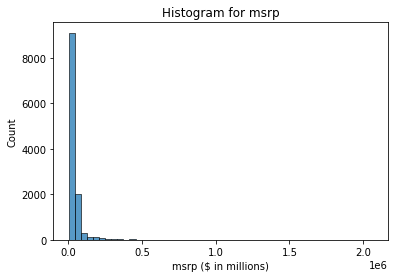

In [11]:
sns.histplot(df.msrp, bins=50)
plt.title('Histogram for msrp')
plt.xlabel('msrp ($ in millions)');

This type of distribution is called **Long Tail Distribution**.

Let's zoom in the histogram to see it a bit clearer.

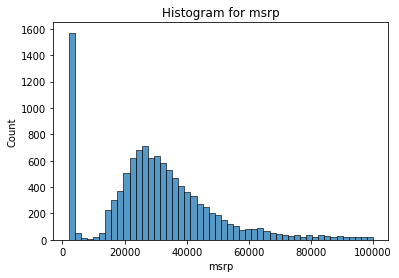

In [12]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)
plt.title('Histogram for msrp')
plt.xlabel('msrp');

The peak cost of cars is $1000. The reason could possibly be that this is the lowest value that is possible to put in the platform.

The average would be about $25,000

This kind of distribution is not really good for ML (the tail will confuse the model).

To get rid of this long tail, we will apply **logarithmic distribution** to get more compact values

### Logarithmic distribution

Since we cannot apply the log function to 0 (undefined), we will add 1 to each value to be sure that there are no 0s.

>`np.log([0+1, 1+1, 10+1, 1000+1, 100000+1])`

>output:
`array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])`

A NumPy function adds 1s manually, called `np.log1p()`

In [13]:
# Apply logarithmic dist. to msrp
price_logs = np.log1p(df.msrp)

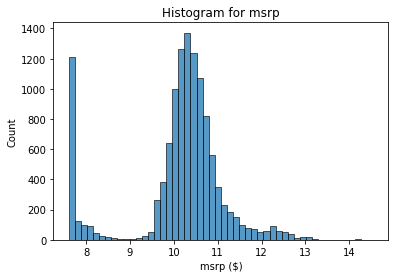

In [14]:
sns.histplot(price_logs, bins=50)
plt.title('Histogram for msrp')
plt.xlabel('msrp ($)');

The tail is now gone and we can visualize it better.

The bell curve shape represents normal distribution.

### Missing values

In [15]:
# Number of missing values for each column
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# 3. Setting up the validation framework

### Shuffle and split the dataset

We will split the dataset into 3 parts:

- **Train:** 60%
- **Validation:** 20%
- **Test:** 20%

We will do it manually without using a library for it

In [16]:
# Size of whole dataset
n = len(df)

n_val = int(n*0.2) # Validation set size
n_test= int(n*0.2) # Test set size
n_train = n - n_val - n_test # Train set size

n_train, n_val, n_test

(7150, 2382, 2382)

In [29]:
np.random.seed(2)
# Generate the indices
idx = np.arange(n)
# Shuffle indices
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [34]:
# Split the dataset
df_train = df.iloc[idx[:n_train]].reset_index(drop=True)
df_val = df.iloc[idx[n_train : n_train+n_val]].reset_index(drop=True)
df_test = df.iloc[idx[n_train+n_val:]].reset_index(drop=True)

In [35]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

### Apply log transformation to target variable y (msrp)

In [36]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

y_test

array([ 7.60140233,  8.07464908, 10.34563811, ..., 10.27852782,
       10.00789261, 10.40414162])

### Remove target variable from dataframe


In [37]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

This is to avoid using it as a feature

# 4. Linear Regression

Linear regression is a model that is used to solve **regression** problems. 

The output of the model is a number.

``g(X) ≈ y``

* g-> Model *(Linear regression)*
* X -> Feature matrix
* y -> Target *(mrsp)*

``g(xi) = w0 + w1**xi1** + w2**xi2** + w3**xi3**``

w0 -> bias term

`g(xi) = w0 + Σ wj ⋅ xij`

